In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
import os
import pickle

import sys
sys.path.insert(0, "/Users/bengieru/Neuronal_Cascades/Cython")


from Neuronal_Cascades_base import neuron
from Neuronal_Cascades_base import Geometric_Brain_Network
from scipy.special import comb

In [2]:
def display_comm_sizes(Q, labels, GD, nGD, thresh, ax):  
    
    argmaxs = []
    colors = ['violet', 'green', 'black', 'lime', 'blue', 'orange', 'brown', 'yellow', 'red', 'turquoise', 
                  'purple']
    
    for j in range(len(Q)):
        Q_mean = np.mean(Q[j], axis = 0)
        argmaxs.append(np.argmax(Q_mean))
        
    X = np.linspace(0, int(np.min([TIME-2,np.max(argmaxs)])+1), int(np.min([TIME-2,np.max(argmaxs)])+2))

    
    for i in range(len(Q)):
        Q_mean = np.mean(Q[i], axis = 0)
        
        if i == 0: ax.plot(Q_mean[:int(np.min([TIME-2,np.max(argmaxs)])+2)], 
                               label = 'K = %.2f'%labels[i], 
                               linestyle = 'dashed', 
                               marker = 'v',
                               color = colors[i%11])
            
        else: ax.plot(Q_mean[:int(np.min([TIME-2,np.max(argmaxs)])+2)], 
                          label = 'K = %.2f'%labels[i], 
                          marker = 'v', 
                          color = colors[i%11])
            
        ax.fill_between(X, 
                            np.max(Q[i], axis = 0)[:int(np.min([TIME-2,np.max(argmaxs)])+2)], 
                            np.min(Q[i], axis = 0)[:int(np.min([TIME-2,np.max(argmaxs)])+2)], 
                            alpha = 0.2, color = colors[i%11])
            
    ax.set_title('Ring network on 500 nodes with GD = %d, nGD = %d, Threshold = %.2f'%(GD, nGD, thresh), fontsize = 25)
    ax.set_xlabel('Time', fontsize = 20)
    ax.set_ylabel('Number of Active Nodes', fontsize = 20)
    ax.legend()
    ax.legend(bbox_to_anchor=(0,0.9), bbox_transform=fig.transFigure)
    return(fig,ax)

In [16]:
size = 500
GD = 20
nGD = [0,2,4,6,8,10,12,14,16,18,20]
topology = 'Ring'

TIME = 200
trials = 1
C = 10000

memory = TIME
rest = 0
thresholds = np.linspace(0,0.4,21)
Ks = np.linspace(0,1,21)

base_path = '/Users/bengieru/Neuronal_Cascades/Simplicial_Model/Results/'
path = base_path

In [4]:
deltas = []
for i in range(len(nGD)):
    with open(path + 'delta_matrix_mins_%d.pkl'%nGD[i], 'rb') as handle:
        deltas.append(pickle.load(handle))

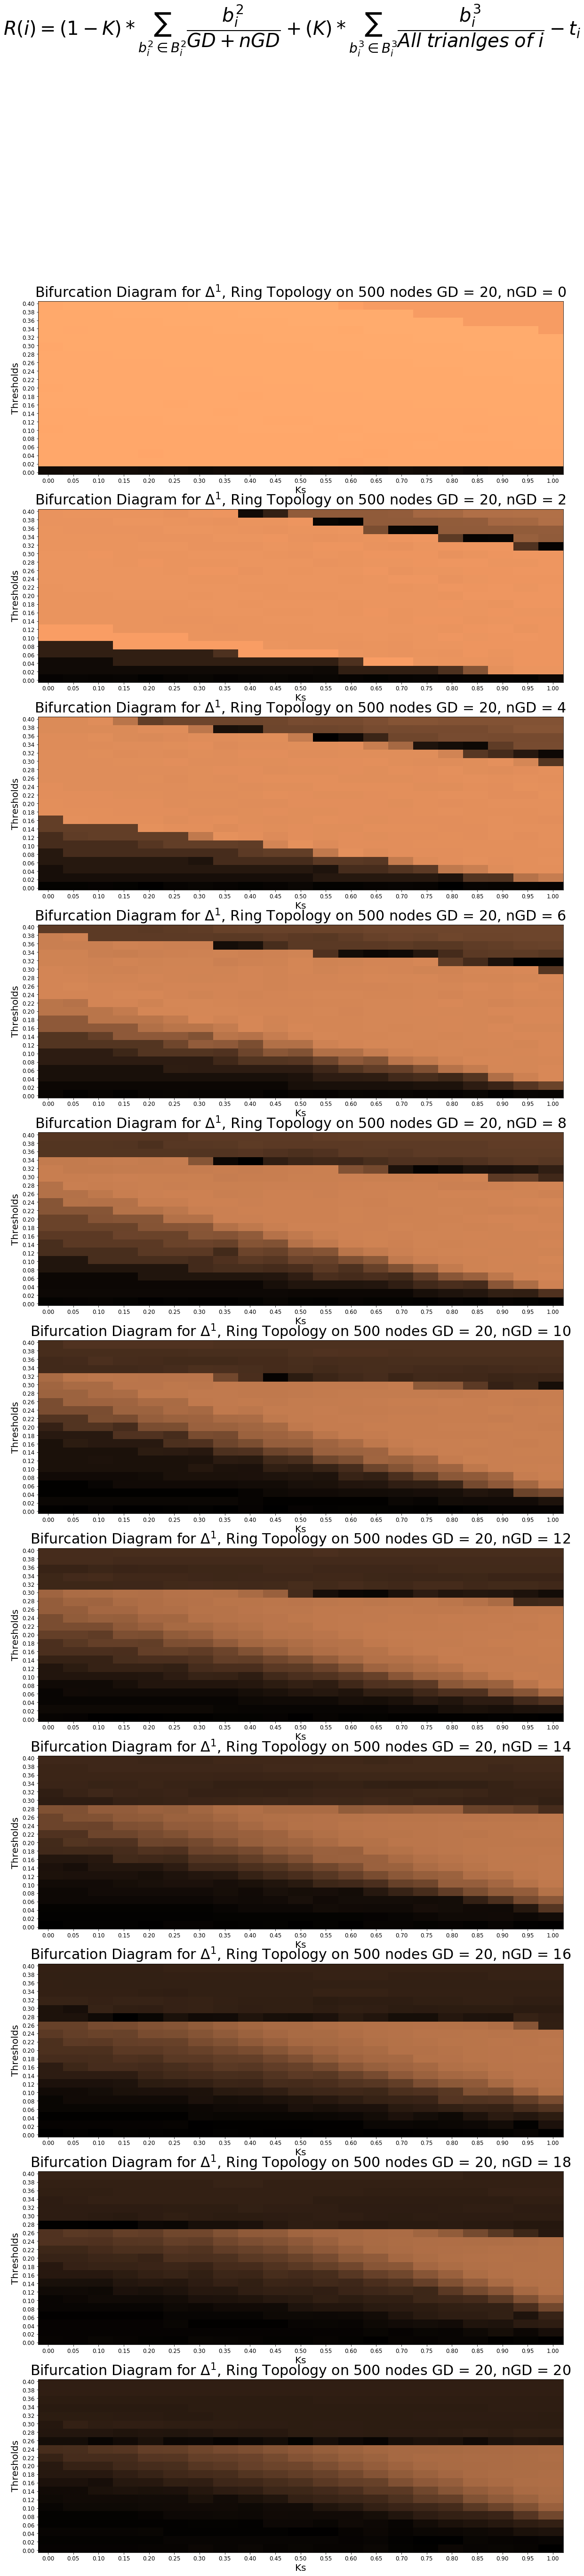

In [5]:
fig,ax = plt.subplots(len(nGD),1,figsize = (20,len(nGD)*8))
fig.suptitle(r'$R(i) = (1-K)*\sum_{b^{2}_{i}\in B^{2}_{i}}\dfrac{b^{2}_{i}}{GD+nGD}+(K)*\sum_{b^{3}_{i}\in B^{3}_{i}}\dfrac{b^{3}_{i}}{All \hspace{0.3} trianlges \hspace{0.3} of \hspace{0.3} i} - t_{i}$', fontsize = 40)
for i in range(len(nGD)):
    
    normalize = Normalize(vmin=0, vmax=1)
    im = ax[i].imshow(deltas[i].T, origin = 'lower', norm = normalize, interpolation='nearest', 
                      aspect='auto', cmap = 'copper', 
                      extent = [Ks[0] - 0.02, Ks[-1] + 0.02, thresholds[0]-0.005, thresholds[-1]+0.005])
    ax[i].set_title(r'Bifurcation Diagram for $\Delta^{1}$, Ring Topology on %d nodes GD = %d, nGD = %d'%(size,GD,nGD[i]), fontsize = 30)
    ax[i].set_xticks(Ks)
    ax[i].set_yticks(thresholds)
    ax[i].set_xlabel('Ks', fontsize = 20 )
    ax[i].set_ylabel('Thresholds', fontsize = 20)
    ax[i].tick_params(axis = 'both', labelsize = 12)
    
    #fig.colorbar(im)

In [6]:
comm_sizes = []
for i in range(len(thresholds)):
    with open(path + 'comm_sizes_thresh=%.2f.pkl'%thresholds[i], 'rb') as handle:
        comm_sizes.append(pickle.load(handle))

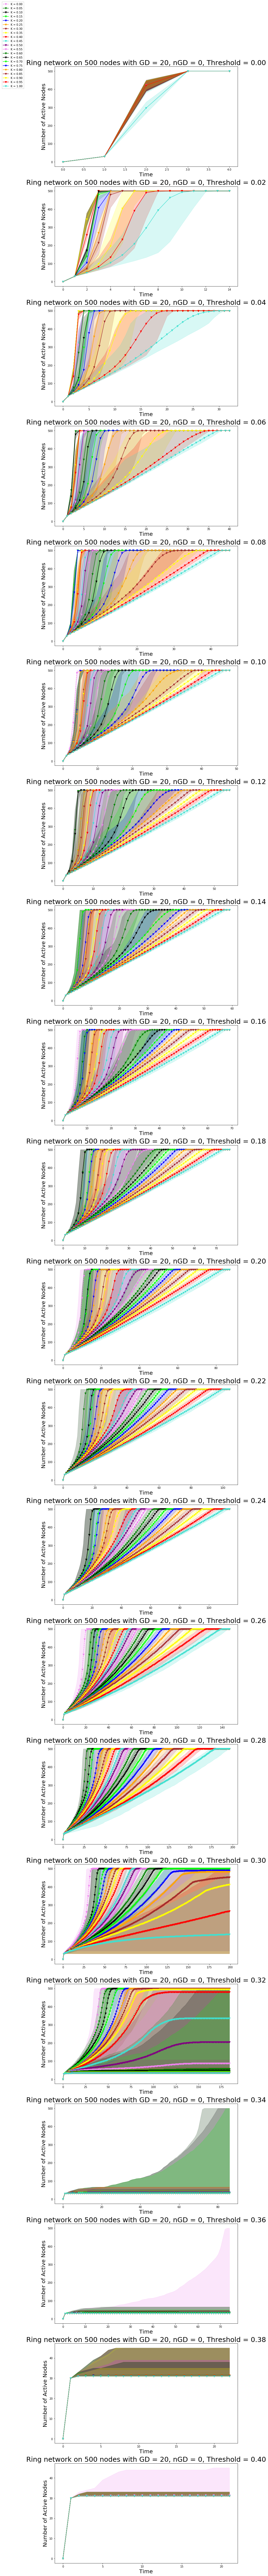

In [7]:
fig,ax = plt.subplots(len(thresholds),1, figsize = (12,8*len(thresholds)))
for i in range(len(thresholds)):
    display_comm_sizes(comm_sizes[i], Ks, GD, nGD[0], thresholds[i], ax[i])

In [8]:
def T_WFP(GD, nGD, k, K, TRI):
    deg = nGD + GD
    return((1-K)*((int(GD/2)-k)/deg)+K*(comb(int(GD/2)-k, 2)/TRI))

def T_ANC(GD, nGD, l, K, TRI):
    deg = nGD + GD
    return((1-K)*((nGD-l)/deg)+K*(comb(nGD-l, 2)/TRI))

def num_TRI(A):
    return(np.sum(np.dot(A,A)*A,0))

In [9]:
size = 200
topology = 'Ring'

TIME = 80
trials = 1
C = 1000

memory = TIME
rest = 0

GD= 6
nGD= [i for i in range(GD+1)]
K = np.linspace(0,1,21)
k = 0

CPU times: user 25.8 ms, sys: 2.86 ms, total: 28.7 ms
Wall time: 32.1 ms


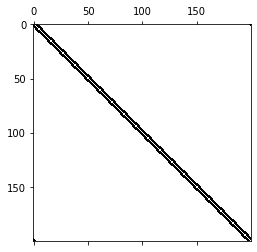

In [10]:
%%time
GBN1 = Geometric_Brain_Network.Geometric_Brain_Network(size, geometric_degree = GD, 
                                                       nongeometric_degree = nGD[0], 
                                                       manifold = topology)
Adjacency = GBN1.A

TRI = min(num_TRI(Adjacency))
plt.spy(Adjacency)

Text(0, 0.5, 'Thresholds')

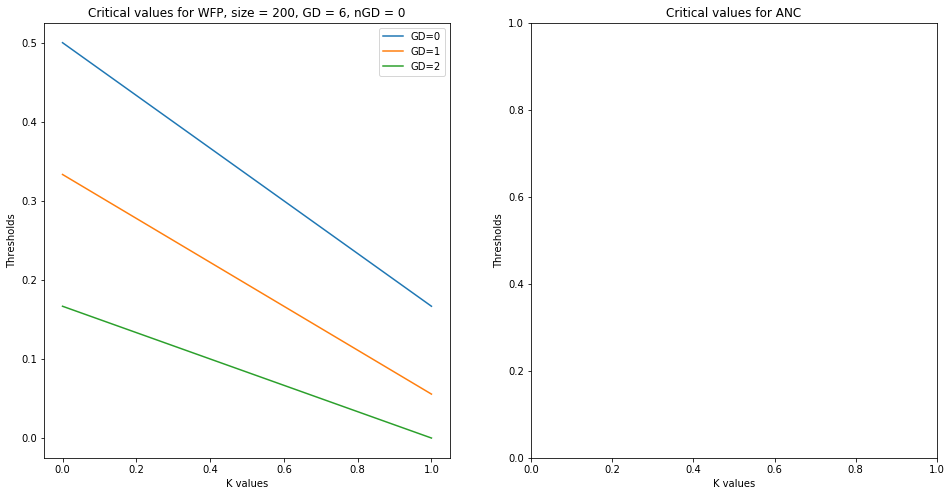

In [11]:
fig,ax = plt.subplots(1,2,figsize = (16,8))
for k in range(int(GD/2)):
    ax[0].plot(K,T_WFP(GD,nGD[0],k,K,TRI), label = 'GD=%d'%k)
for l in range(nGD[0]):
    ax[1].plot(K,T_ANC(GD,nGD[0],l,K,TRI), linestyle = 'dashed', label = 'nGD=%d'%l)
ax[0].legend()
ax[0].set_title('Critical values for WFP, size = %d, GD = %d, nGD = %d'%(size,GD,nGD[0]))
ax[0].set_xlabel('K values')
ax[0].set_ylabel('Thresholds')

ax[1].set_title('Critical values for ANC')
ax[1].set_xlabel('K values')
ax[1].set_ylabel('Thresholds')

CPU times: user 57.4 ms, sys: 2.99 ms, total: 60.3 ms
Wall time: 59.9 ms


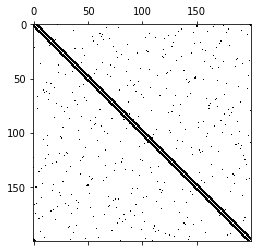

In [12]:
%%time
GBN1 = Geometric_Brain_Network.Geometric_Brain_Network(size, geometric_degree = GD, 
                                                       nongeometric_degree = nGD[2], 
                                                       manifold = topology)
Adjacency = GBN1.A

TRI = int(np.mean(num_TRI(Adjacency)))
plt.spy(Adjacency)

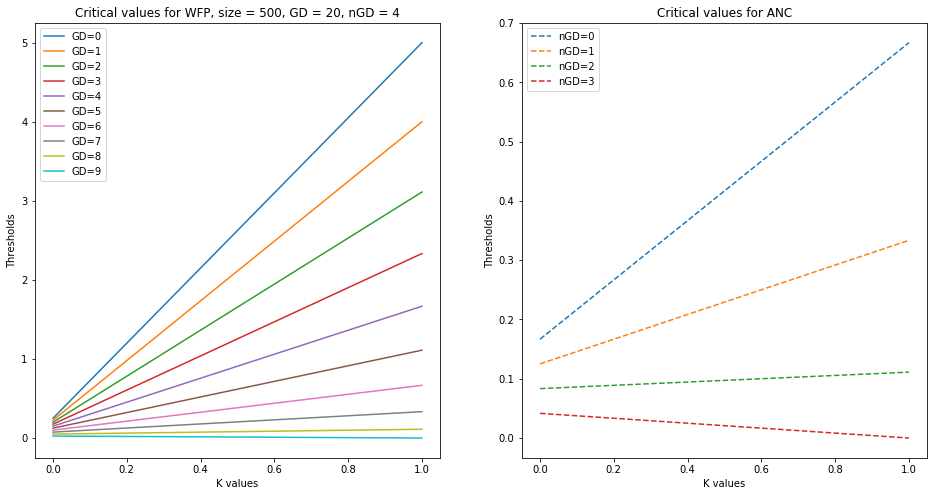

In [26]:
fig,ax = plt.subplots(1,2,figsize = (16,8))
for k in range(int(GD/2)):
    ax[0].plot(K,T_WFP(GD,nGD[10],k,K,TRI/2), label = 'GD=%d'%k)
    #normalize = Normalize(vmin=0, vmax=1)
    #im = ax[0].imshow(deltas[10].T, origin = 'lower', norm = normalize, interpolation='nearest', aspect='auto', cmap = 'copper') 
for l in range(nGD[2]):
    ax[1].plot(K,T_ANC(GD,nGD[2],l,K,TRI/2), linestyle = 'dashed', label = 'nGD=%d'%l)
ax[0].legend()
ax[0].set_title('Critical values for WFP, size = %d, GD = %d, nGD = %d'%(size,GD,nGD[2]))
ax[0].set_xlabel('K values')
ax[0].set_ylabel('Thresholds')

ax[1].set_title('Critical values for ANC')
ax[1].set_xlabel('K values')
ax[1].set_ylabel('Thresholds')
ax[1].legend()

In [28]:
size = 500
GD = 20
nGD = [0,2,4,6,8,10,12,14,16,18,20]
topology = 'Ring'

TIME = 200
trials = 1
C = 10000

memory = TIME
rest = 0
thresholds = np.linspace(0,0.4,21)
Ks = np.linspace(0,1,21)

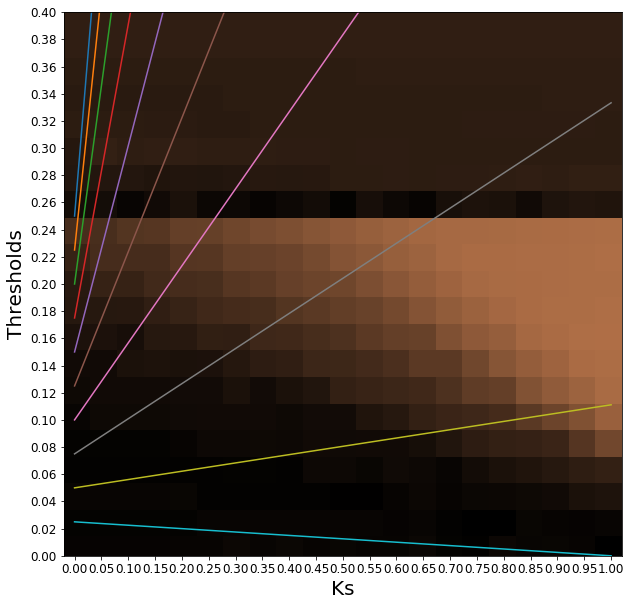

In [29]:
fig,ax = plt.subplots(1,1,figsize = (10,10))
#fig.suptitle(r'$R(i) = (1-K)*\sum_{b^{2}_{i}\in B^{2}_{i}}\dfrac{b^{2}_{i}}{GD+nGD}+(K)*\sum_{b^{3}_{i}\in B^{3}_{i}}\dfrac{b^{3}_{i}}{All \hspace{0.3} trianlges \hspace{0.3} of \hspace{0.3} i} - t_{i}$', fontsize = 40)
normalize = Normalize(vmin=0, vmax=1)
im = ax.imshow(deltas[10].T, origin = 'lower', norm = normalize, interpolation='nearest', 
                      aspect='auto', cmap = 'copper', 
                      extent = [Ks[0] - 0.02, Ks[-1] + 0.02, thresholds[0]-0.005, thresholds[-1]+0.005])
#ax.set_title(r'Bifurcation Diagram for $\Delta^{1}$, Ring Topology on %d nodes GD = %d, nGD = %d'%(size,GD,nGD[i]), fontsize = 30)
ax.set_xticks(Ks)
ax.set_yticks(thresholds)
ax.set_xlabel('Ks', fontsize = 20 )
ax.set_ylabel('Thresholds', fontsize = 20)
ax.tick_params(axis = 'both', labelsize = 12)
ax.set_ylim(0,0.4)

for k in range(int(GD/2)):
    ax.plot(K,T_WFP(GD,nGD[10],k,K,TRI/2), label = 'GD=%d'%k)
#for l in range(nGD[2]):
    #ax[1].plot(K,T_ANC(GD,nGD[2],l,K,TRI/2), linestyle = 'dashed', label = 'nGD=%d'%l)